### Import

In [78]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [79]:
filename = "LoanApprovalStatus_data.csv"
df = pd.read_csv(filename)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [80]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [81]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [82]:
df.shape

(45000, 14)

In [83]:
column_name = df.columns

In [84]:
column_name

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [85]:
data = df.copy()
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})
data['person_gender'] = data['person_gender'].map({'male': 1, 'female': 0})
data['person_education'] = data['person_education'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 
                                                         'Master': 3, 'Doctorate': 4
                                                         })
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [86]:
data = data.query('person_age <=80')
data.shape

(44991, 14)

In [88]:
le = LabelEncoder()
data[ 'person_home_ownership'] = le.fit_transform(data['person_home_ownership'])
data[ 'loan_intent'] = le.fit_transform(data['loan_intent'])

# Handle missing values if any
numeric_columns = ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [91]:
corr = data.corr().round(2)
threshold = 0.10
mask = np.abs(corr) < threshold 
corr[mask] = np.nan  

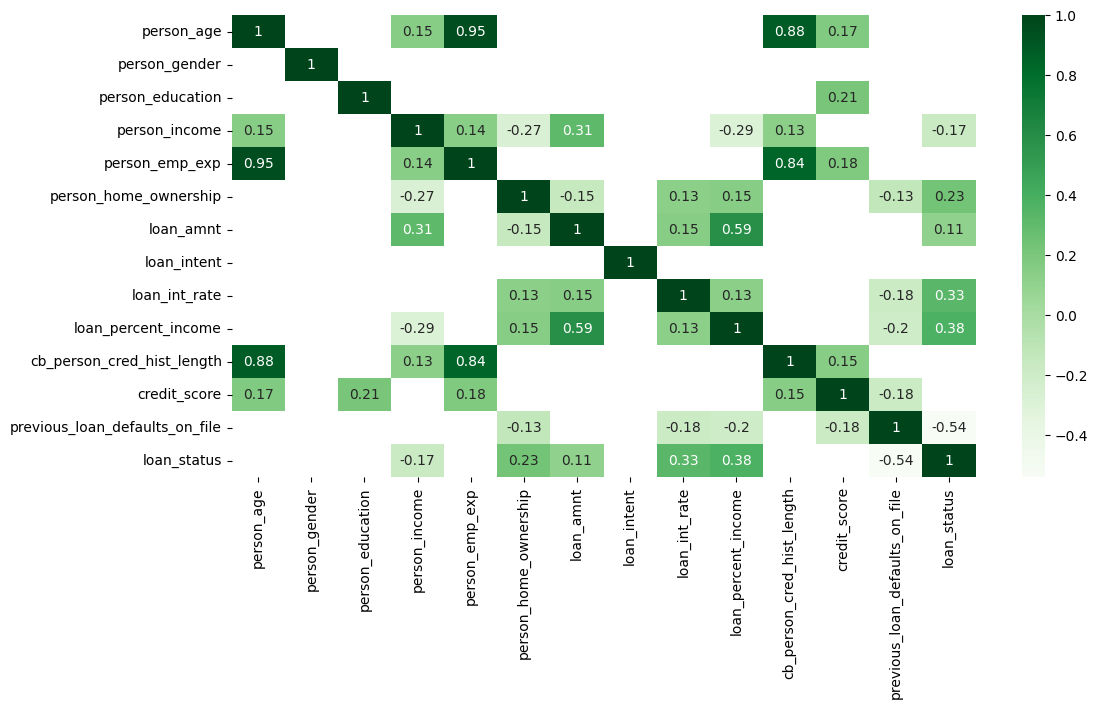

In [92]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [94]:
data.drop(['person_gender', 'loan_intent'], axis = 1, inplace = True) #Removing gender and intent as these two has no correlation with loan status 

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44991 entries, 0 to 44999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44991 non-null  float64
 1   person_education                44991 non-null  int64  
 2   person_income                   44991 non-null  float64
 3   person_emp_exp                  44991 non-null  int64  
 4   person_home_ownership           44991 non-null  int64  
 5   loan_amnt                       44991 non-null  float64
 6   loan_int_rate                   44991 non-null  float64
 7   loan_percent_income             44991 non-null  float64
 8   cb_person_cred_hist_length      44991 non-null  float64
 9   credit_score                    44991 non-null  int64  
 10  previous_loan_defaults_on_file  44991 non-null  int64  
 11  loan_status                     44991 non-null  int64  
dtypes: float64(6), int64(6)
memory usage:

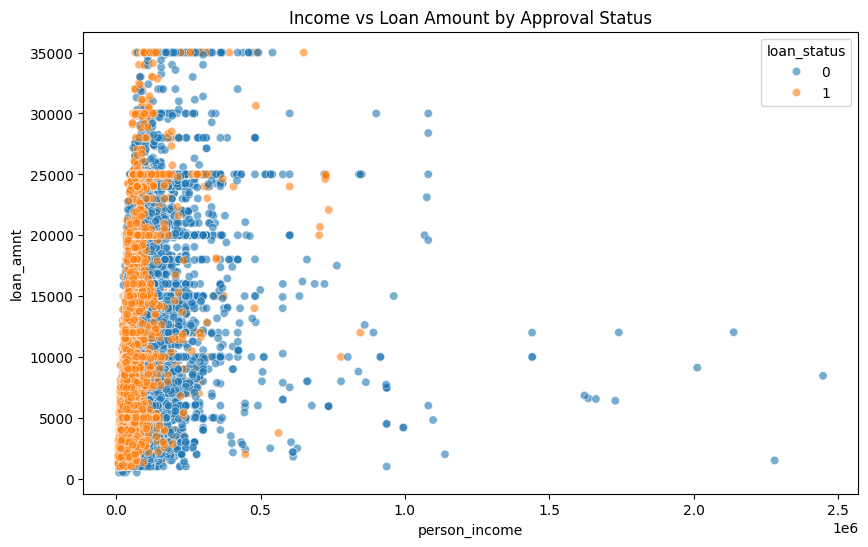

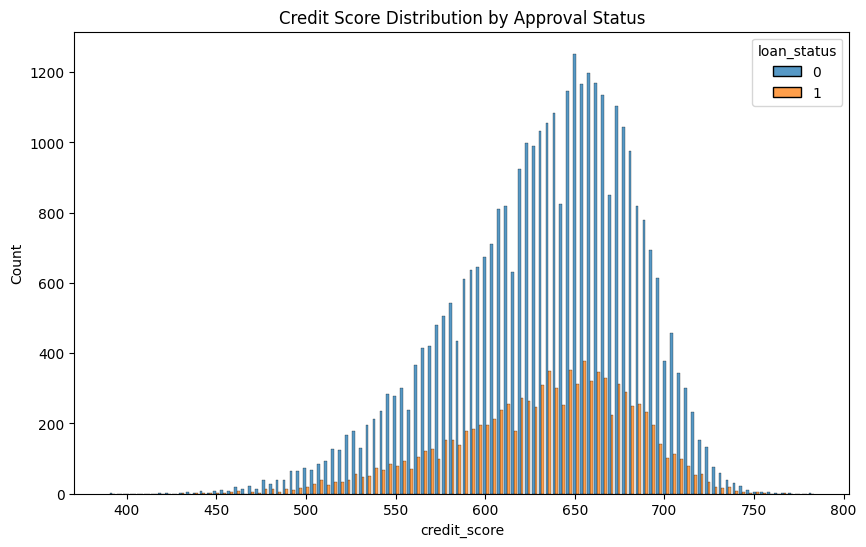

In [96]:
# Income vs Loan Amount scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='person_income', y='loan_amnt', 
                    hue='loan_status', alpha=0.6)
plt.title('Income vs Loan Amount by Approval Status')
plt.show()
    
# Credit Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='credit_score', hue='loan_status', 
                multiple="dodge", shrink=.8)
plt.title('Credit Score Distribution by Approval Status')
plt.show()
    

In [99]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_train, y_train)

/Users/nasalaha/pythonprojects/buildai/lib/python3.13/site-packages/sklearn/utils/optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.23875281788742223. Increase the number of iterations.
  warnings.warn(


In [113]:
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(train_acc)
print(test_acc)

0.8894476550344521
0.8820980108900989


In [114]:
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print(train_auc)
print(test_auc)

0.9479819169544459
0.9452139578204666


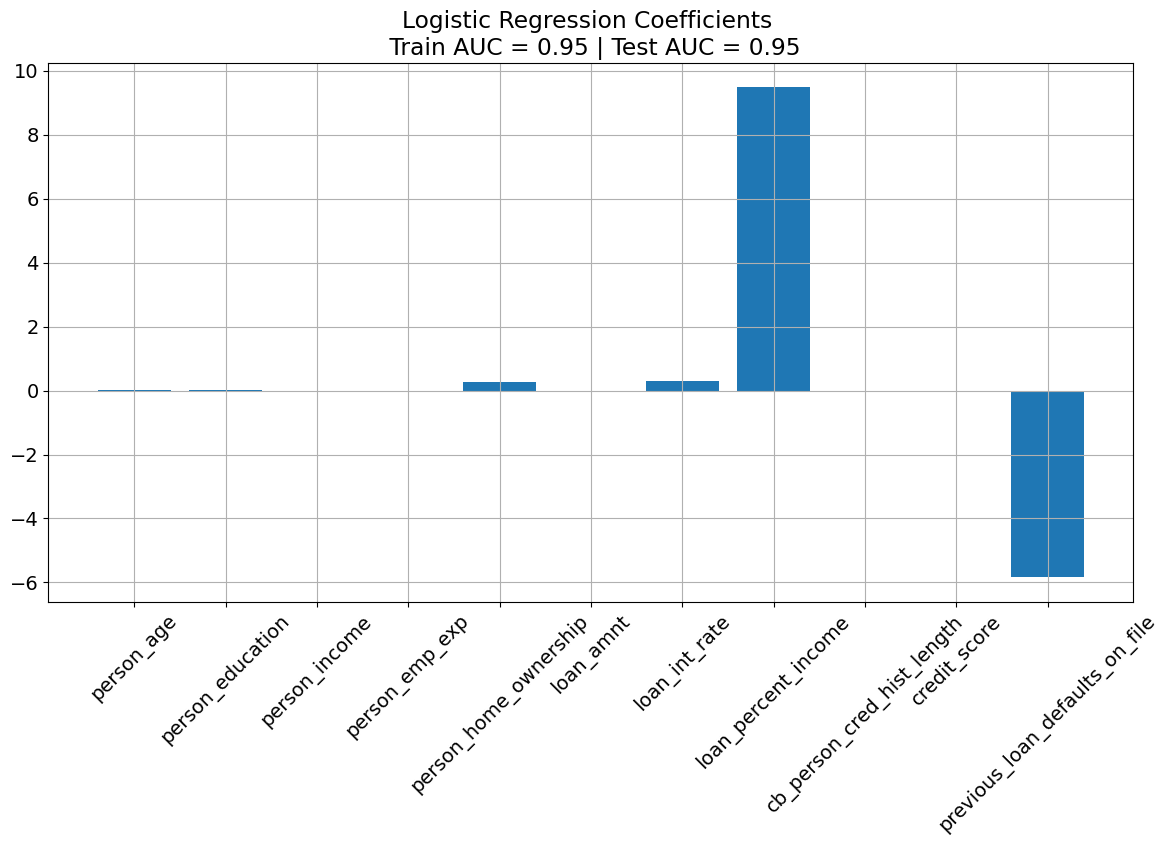

In [115]:
num_vars = len(X.columns)

plt.figure(figsize=(14, 7))
plt.rcParams.update({'font.size': 14})

plt.bar(np.linspace(1,num_vars,num_vars), clf.coef_[0])
plt.grid()
plt.xticks(np.linspace(1,num_vars,num_vars), X.columns, rotation=45)
plt.title(f"Logistic Regression Coefficients \n Train AUC = {round(train_auc,2)} | Test AUC = {round(test_auc,2)}")
plt.show()